In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


In [19]:
billing_file = "C:/Users/TAMIAZ/Desktop/REVENUE/billing.csv"
revenue_file = "C:/Users/TAMIAZ/Desktop/REVENUE/revenue.csv"


In [20]:
def analyze_highest_revenue(billing_file, revenue_file):
    billing_df = pd.read_csv(billing_file)
    revenue_df = pd.read_csv(revenue_file)
    
    billing_df["amount_wo_vat_eur"] = billing_df["amount_wo_vat_eur"].str.replace("€", "", regex=False).str.replace(",", "", regex=False).str.strip()
    billing_df["amount_wo_vat_eur"] = pd.to_numeric(billing_df["amount_wo_vat_eur"], errors='coerce')
    billing_df["created_dts_adj"] = pd.to_datetime(billing_df["created_dts_adj"], errors="coerce")

    revenue_df["Month"] = pd.to_datetime(revenue_df["Month"], errors="coerce")
    revenue_df["Value"] = pd.to_numeric(revenue_df["Value"], errors='coerce')
    revenue_df.dropna(subset=["Month", "Value"], inplace=True)

    monthly_revenue = revenue_df.groupby("Month")["Value"].sum().reset_index()

    max_revenue_month = monthly_revenue.loc[monthly_revenue["Value"].idxmax(), "Month"]
    max_revenue_value = monthly_revenue["Value"].max()

    if "product_category" in revenue_df.columns:
        top_product = revenue_df[revenue_df["Month"] == max_revenue_month].groupby("product_category")["Value"].sum().idxmax()
        top_product_value = revenue_df[(revenue_df["Month"] == max_revenue_month) & (revenue_df["product_category"] == top_product)]["Value"].sum()
    else:
        top_product, top_product_value = None, None

    monthly_revenue["Month_Num"] = monthly_revenue["Month"].dt.year * 12 + monthly_revenue["Month"].dt.month
    X = monthly_revenue[["Month_Num"]]
    y = monthly_revenue["Value"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    next_month = pd.DataFrame([[X["Month_Num"].max() + 1]], columns=["Month_Num"])
    next_month_poly = poly.transform(next_month)
    predicted_revenue = model.predict(next_month_poly)[0]

    return {
        "Highest Revenue Month": max_revenue_month.strftime('%Y-%m'),
        "Total Revenue": max_revenue_value,
        "Top Product": top_product,
        "Product Revenue": top_product_value,
        "Predicted Next Month Revenue": predicted_revenue,
        "monthly_revenue_df": monthly_revenue,
        "revenue_df": revenue_df
    }


In [21]:
def analyze_highest_revenue(billing_file, revenue_file):
    billing_df = pd.read_csv(billing_file)
    revenue_df = pd.read_csv(revenue_file)
    
    billing_df["amount_wo_vat_eur"] = billing_df["amount_wo_vat_eur"].str.replace("€", "", regex=False).str.replace(",", "", regex=False).str.strip()
    billing_df["amount_wo_vat_eur"] = pd.to_numeric(billing_df["amount_wo_vat_eur"], errors='coerce')
    billing_df["created_dts_adj"] = pd.to_datetime(billing_df["created_dts_adj"], errors="coerce")

    revenue_df["Month"] = pd.to_datetime(revenue_df["Month"], errors="coerce")
    revenue_df["Value"] = pd.to_numeric(revenue_df["Value"], errors='coerce')
    revenue_df.dropna(subset=["Month", "Value"], inplace=True)

    monthly_revenue = revenue_df.groupby("Month")["Value"].sum().reset_index()

    max_revenue_month = monthly_revenue.loc[monthly_revenue["Value"].idxmax(), "Month"]
    max_revenue_value = monthly_revenue["Value"].max()

    if "product_category" in revenue_df.columns:
        top_product = revenue_df[revenue_df["Month"] == max_revenue_month].groupby("product_category")["Value"].sum().idxmax()
        top_product_value = revenue_df[(revenue_df["Month"] == max_revenue_month) & (revenue_df["product_category"] == top_product)]["Value"].sum()
    else:
        top_product, top_product_value = None, None

    monthly_revenue["Month_Num"] = monthly_revenue["Month"].dt.year * 12 + monthly_revenue["Month"].dt.month
    X = monthly_revenue[["Month_Num"]]
    y = monthly_revenue["Value"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    next_month = pd.DataFrame([[X["Month_Num"].max() + 1]], columns=["Month_Num"])
    next_month_poly = poly.transform(next_month)
    predicted_revenue = model.predict(next_month_poly)[0]

    return {
        "Highest Revenue Month": max_revenue_month.strftime('%Y-%m'),
        "Total Revenue": max_revenue_value,
        "Top Product": top_product,
        "Product Revenue": top_product_value,
        "Predicted Next Month Revenue": predicted_revenue,
        "monthly_revenue_df": monthly_revenue,
        "revenue_df": revenue_df
    }


In [22]:
def analyze_highest_revenue(billing_file, revenue_file):
    billing_df = pd.read_csv(billing_file)
    revenue_df = pd.read_csv(revenue_file)
    
    billing_df["amount_wo_vat_eur"] = billing_df["amount_wo_vat_eur"].str.replace("€", "", regex=False).str.replace(",", "", regex=False).str.strip()
    billing_df["amount_wo_vat_eur"] = pd.to_numeric(billing_df["amount_wo_vat_eur"], errors='coerce')
    billing_df["created_dts_adj"] = pd.to_datetime(billing_df["created_dts_adj"], errors="coerce")

    revenue_df["Month"] = pd.to_datetime(revenue_df["Month"], errors="coerce")
    revenue_df["Value"] = pd.to_numeric(revenue_df["Value"], errors='coerce')
    revenue_df.dropna(subset=["Month", "Value"], inplace=True)

    monthly_revenue = revenue_df.groupby("Month")["Value"].sum().reset_index()

    max_revenue_month = monthly_revenue.loc[monthly_revenue["Value"].idxmax(), "Month"]
    max_revenue_value = monthly_revenue["Value"].max()

    if "product_category" in revenue_df.columns:
        top_product = revenue_df[revenue_df["Month"] == max_revenue_month].groupby("product_category")["Value"].sum().idxmax()
        top_product_value = revenue_df[(revenue_df["Month"] == max_revenue_month) & (revenue_df["product_category"] == top_product)]["Value"].sum()
    else:
        top_product, top_product_value = None, None

    monthly_revenue["Month_Num"] = monthly_revenue["Month"].dt.year * 12 + monthly_revenue["Month"].dt.month
    X = monthly_revenue[["Month_Num"]]
    y = monthly_revenue["Value"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    next_month = pd.DataFrame([[X["Month_Num"].max() + 1]], columns=["Month_Num"])
    next_month_poly = poly.transform(next_month)
    predicted_revenue = model.predict(next_month_poly)[0]

    return {
        "Highest Revenue Month": max_revenue_month.strftime('%Y-%m'),
        "Total Revenue": max_revenue_value,
        "Top Product": top_product,
        "Product Revenue": top_product_value,
        "Predicted Next Month Revenue": predicted_revenue,
        "monthly_revenue_df": monthly_revenue,
        "revenue_df": revenue_df
    }


In [23]:
result = analyze_highest_revenue(billing_file, revenue_file)

# Store DataFrames for later plotting
monthly_revenue = result["monthly_revenue_df"]
revenue_df = result["revenue_df"]

# Print results
for key, value in result.items():
    if "df" not in key:
        print(f"{key}: {value}")


Highest Revenue Month: 2024-01
Total Revenue: 137340
Top Product: Product1
Product Revenue: 74097
Predicted Next Month Revenue: 91953.1579284668


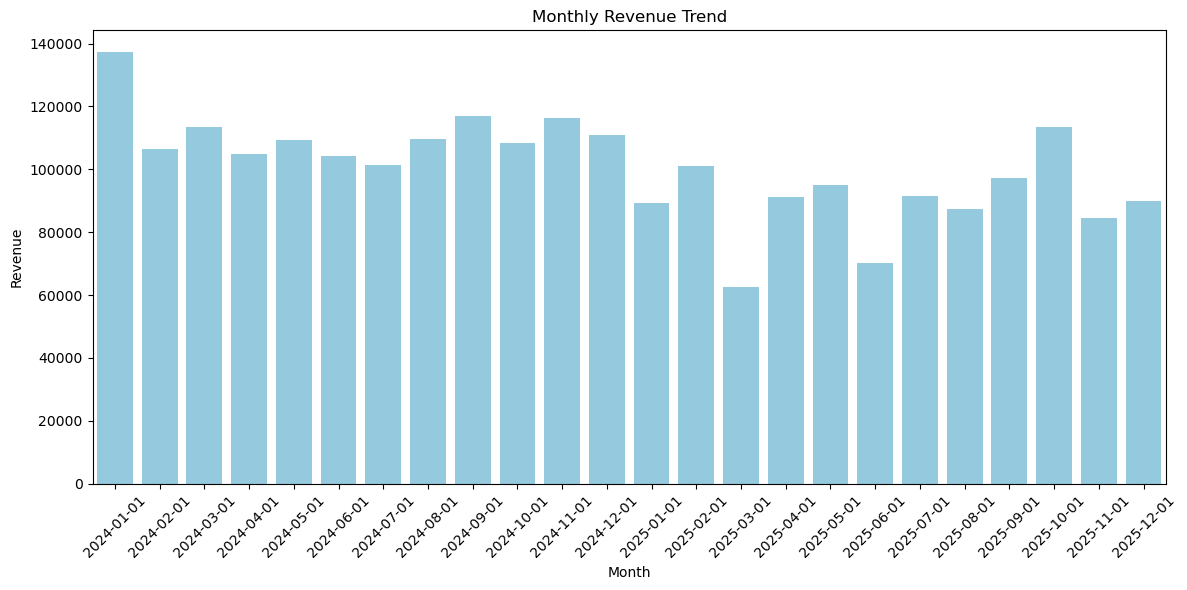

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_revenue, x="Month", y="Value", color="skyblue")
plt.title("Monthly Revenue Trend")
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()


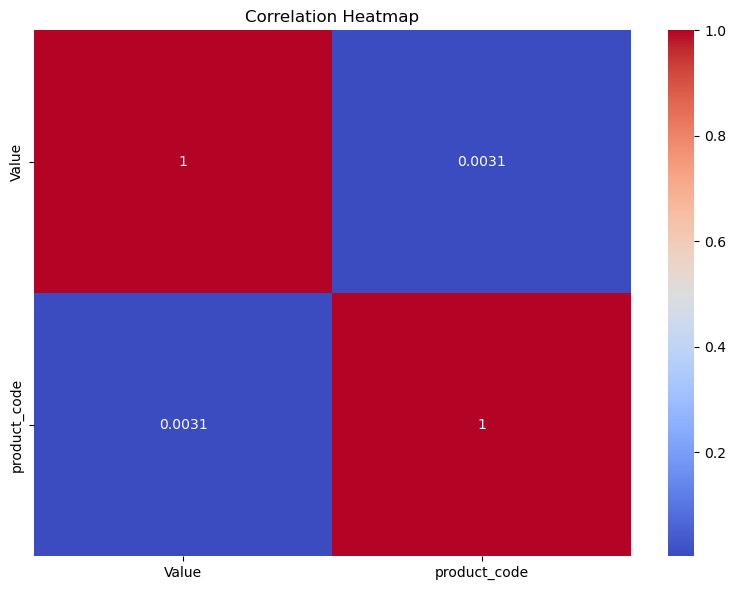

In [25]:
if "product_category" in revenue_df.columns:
    plt.figure(figsize=(8, 6))
    revenue_df['product_code'] = revenue_df['product_category'].astype('category').cat.codes
    corr = revenue_df[["Value", "product_code"]].corr()
    sns.heatmap(corr, annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.tight_layout()
    plt.show()
else:
    print("No 'product_category' column available for heatmap.")
